# Exploratory work on the ABPI Disclosure data

This  notebook sets out our initial exploratory analysis of the new ABPI data on payments from drug companies to individual UK doctors and institutions. An iPython notebook allows full transparency on how data was analysed, with results presented alongside the analytic code. 

This notebook was written by Anna Powell-Smith of [www.ebmDataLab.net](http://www.ebmdatalab.net) in the University of Oxford, with input from the investigations team at the BMJ and Ben Goldacre at the DataLab. You are welcome to use any of the findings below, but please note that the code has not been peer-reviewed and may contain errors, use these results at your own peril!

The ABPI data is released in two Excel sheets: a "payments" sheet containing every payment to an individual Healthcare Organistion (HCO) or individual Healthcare Provider (HCP) that has not been redacted, and an "aggregates" sheet containing total redacted payments by pharmaceutical company and category. You can find CSV copies of these in the accompanying `data` directory.

Journalists were told at the press conference that around 50% of the payments had been redacted, or about 70% of the value of all payments. Also, details of research funding are not included in the Disclosure database.

Useful links: 

- [Raw data, guidance notes about how the sums were calcluated, and methodological notes by company](http://www.abpi.org.uk/our-work/disclosure/Pages/DocumentLibrary.aspx).
- [The ABPI's own search interface](https://abp-eu-ags.emea.crm.cegedim.com/AggregateSpend360/Posting/ExpenseReport.aspx?postedreporttype=pCctRQJCLQc%3d&reportID=+XHrmDAjLQvO209YxDgJkw%3d%3d&Language=NyRIIBaAuMY9s3bTmUSGXQW6yEjsGDHz&DataValue=qWE1R12&LCID=2057) - only returns 100 rows at a time. 

The ABPI licence (they haven't used a standard one) seems to permit analysis. However it seems that it may explicitly forbid redistribution of the data. The explanatory notes for the data, provided by the ABPI, are unclear; and neither the ABPI nor their data team have responded to questions over the 24 hours since the data was released. 





In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dtype = {
    'Title': str,
    'First Name': str,
    'Last Name': str,
    'Speciality': str,
    'Institution Name': str
}
df = pd.read_csv('./data/payments.csv', dtype=dtype)

## Basic statistics

Calculate number of rows, unique institutions, etc in the payments data. 

In [3]:
print "{:,} rows".format(len(df))
print "£{:,} total declared".format(df['Amount'].sum())
print len(df['Company Name'].unique()), 'companies'
print len(df['Organisation Name'].unique()), 'organisations'
print len(df['Speciality'].unique()), 'specialities'
print len(df['Institution Name'].unique()), 'institutions'
# df.describe(include='all')

50,519 rows
£81,012,756.47 total declared
107 companies
4696 organisations
79 specialities
3468 institutions


Quickly calculate the breakdown between payments to individuals and payments to organisations. 

In [4]:
df_hcps = df[pd.isnull(df['Organisation Name'])]
df_hcos = df[~pd.isnull(df['Organisation Name'])]
a = "{:,} payments to HCOs ({:,.2f}% of total payments)"
print a.format(len(df_hcos), 100 * len(df_hcos) / float(len(df)))
a = "{:,} payments to HCPs ({:,.2f}% of total payments)"
print a.format(len(df_hcps), 100 * len(df_hcps) / float(len(df)))
print 

a = "£{:,} paid to HCOs ({:,.2f}% of total payments)"
print a.format(df_hcos['Amount'].sum(), 100 * df_hcos['Amount'].sum() / df['Amount'].sum())
a = "£{:,} paid to HCPs ({:,.2f}% of total payments)"
print a.format(df_hcps['Amount'].sum(), 100 * df_hcps['Amount'].sum() / df['Amount'].sum())

20,040 payments to HCOs (39.67% of total payments)
30,479 payments to HCPs (60.33% of total payments)

£56,450,186.61 paid to HCOs (69.68% of total payments)
£24,562,569.86 paid to HCPs (30.32% of total payments)


In [12]:
# This is what the raw payments data looks like!
df.head()

,Company Name,Title,First Name,Last Name,Organisation Name,Location,Speciality,City,Country of Principal Practice,Institution Name,Address Line1,Address Line2,Post Code,County,TOV Category,TOV Type,Amount,Joint Working Link
0,Teva UK Limited,Mrs,Francesca,Aaen,NaN,NHS Lanarkshire - Pharmacy Department,Pharmacist,Airdrie,United Kingdom,Monklands General Hospital,Monkscourt Avenue,NaN,ML6 0JS,Lanarkshire,Fee for service and consultancy,Fees,650.00,NaN
1,Teva UK Limited,Mrs,Francesca,Aaen,NaN,NHS Lanarkshire - Pharmacy Department,Pharmacist,Airdrie,United Kingdom,Monklands General Hospital,Monkscourt Avenue,NaN,ML6 0JS,Lanarkshire,Fee for service and consultancy,Related expenses agreed in the fee for service...,5.30,NaN
2,Eli Lilly & Company Ltd,Mrs,Susan,Aarons,NaN,Anchor Trust,Nurse,Bradford,United Kingdom,Ashcroft,Kelvin Way,NaN,BD2 3EF,West Yorkshire,Contribution to costs of Events,Travel & Accommodation,15.00,NaN
3,Meda Pharma,Doctor,Dawn,Aaronson,NaN,Dr R E Adams & Partners,General Medicine,Redhill,United Kingdom,Woodlands Surgery,5 Woodlands Road,NaN,RH1 6EY,Surrey,Contribution to costs of Events,Travel & Accommodation,60.00,NaN
4,Teva UK Limited,_,Christina,Abarno,NaN,NaN,Miscellaneous,Oxford,United Kingdom,Nuffield Department of Clinical Neurosciences,"Level 6, West Wing, John Radcliffe Hospital",NaN,OX3 9DU,Undefined,Contribution to costs of Events,Travel & Accommodation,399.86,NaN


Most payments are small! 50% are below £355, 75% are below £800. Only 1,164 payments are more than £10,000. 

In [6]:
print df['Amount'].describe()
print len(df[df['Amount'] > 10000]), 'payments are more than £10,000'

count     50519.00
mean       1603.61
std       11807.18
min      -62399.71
25%         180.00
50%         355.32
75%         800.00
max     1125000.00
Name: Amount, dtype: float64
1164 payments are more than £10,000


Why are there a few negative payments?

In [7]:
df.sort_values('Amount').head()[['Company Name', 'Organisation Name', 'TOV Type', 'Amount']]

,Company Name,Organisation Name,TOV Type,Amount
37882,Pfizer Ltd,Institute of Cancer Policy,Donations and Grants to HCOs,-62399.71
32882,Merck Sharp & Dohme Ltd,British Society for Rheumatology,Sponsorship agreements with HCOs /3rd parties,-30000.00
37409,Pfizer Ltd,Healthcare At Home,Fees,-3351.55
44593,Pfizer Ltd,Ryl College Emergency Medicine,Sponsorship agreements with HCOs /3rd parties,-3000.00
48524,Pfizer Ltd,University College London,Sponsorship agreements with HCOs /3rd parties,-3000.00


Payment distribution by each TOV category/type, in the payments data. 

In [8]:
df.groupby(('TOV Category', 'TOV Type')).sum().sort_values('Amount', ascending=False)

Amount
TOV Category                    TOV Type                                                      
Donations and Grants to HCOs    Donations and Grants to HCOs                       28764932.33
Fee for service and consultancy Fees                                               22371761.15
Contribution to costs of Events Sponsorship agreements with HCOs /3rd parties      15999826.91
                                Travel & Accommodation                              5480353.79
Joint working                   Joint working                                       3234248.94
Fee for service and consultancy Related expenses agreed in the fee for services...  2657719.07
Contribution to costs of Events Registration Fees                                   2503572.50
Fee for service and consultancy Travel & Accommodation                                  341.78

## Get basic statistics for the aggregate data

Now we can start comparing the data with the aggregate data. We know that this sheet *only* contains information about suppressed payments. 

In [9]:
df_aggregate = pd.read_csv('./data/aggregates.csv')
df_aggregate.head()

,Company Name,Title,First Name,Last Name,Organisation Name,Location,Speciality,City,Country of Principal Practice,Institution Name,Address Line1,Address Line2,Post Code,County,TOV Category,TOV Type,Amount,Joint Working Link,% of all HCP HCO in Aggregate,No of HCP HCO in Aggregate
0,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Registration Fees,0.00,nan,2.79,nan
1,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Registration Fees,0.00,nan,nan,7.00
2,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Registration Fees,3406.45,nan,nan,nan
3,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Travel & Accommodation,0.00,nan,17.53,nan
4,A. Menarini Farmaceutica Internazionale S.r.l.,_,A. Menarini Farmaceutica Inter,A. Menarini Farmaceutica Inter,NaN,nan,Miscellaneous,A. Menarini Farmaceutica Internazionale S.r.l.,United Kingdom,nan,A. Menarini Farmaceutica Internazionale S.r.l.,nan,XX,Undefined,Contribution to costs of Events,Travel & Accommodation,0.00,nan,nan,44.00


## How much is missing?

By my calculations, the declared payments cover £81m, and the undeclared payments cover £282m, so 78% of all spending is undeclared.

In [26]:
agg_payments = df_aggregate['Amount'].sum()
known_payments = df['Amount'].sum()
total_payments = agg_payments + known_payments

print 'Total payments in the aggregate sheet', "£{:,}".format(agg_payments)
print 'Total payments in the payments sheet', "£{:,}".format(known_payments)
print 'Percentage undeclared: {:.2f}%'.format(agg_payments / total_payments * 100)

Total payments in the aggregate sheet £282,797,449.25
Total payments in the payments sheet £81,012,756.47
Percentage undeclared: 77.73%


## Examine the gaps in the data, by company

With the limited and redacted data we have, perhaps the most meaningful thing we can look at is the amount of data that is missing!

The only thing we know about the missing data is the amount of it for each company, in each TOV category. 

We can also derive, from the payments that *are* declared, the % by company and TOV category that was not declared. 

The table below shows only companies with payments over £1 million in total. 

In [33]:
# Get all aggregate payments but EXCLUDE R&D. 
# This is because no R&D payments are included in the payments sheet.
df_agg_ex_rd = df_aggregate[df_aggregate['TOV Category'] != 'Research & Development']
df_agg_by_co = df_agg_ex_rd.groupby(('Company Name')).sum().reset_index()
df_agg = df_agg_by_co[['Company Name', 'Amount']]
df_by_co = df.groupby(('Company Name')).sum().reset_index()
df_merged = pd.merge(df_agg, df_by_co, on=['Company Name'], 
                     suffixes=(' Aggregate', ' Declared'))
df_merged['Total Amount'] = df_merged['Amount Declared'] + \
    df_merged['Amount Aggregate']
df_merged['Proportion Undeclared'] = df_merged['Amount Aggregate'] / \
    df_merged['Total Amount']
df_merged.sort_values('Proportion Undeclared', ascending=False, inplace=True)
df_merged.to_csv('declared_vs_aggregated_payments_by_company.csv')

# Show all companies for which total amount > £1 million
df_merged[df_merged['Total Amount'] > 1000000]


,Company Name,Amount Aggregate,Amount Declared,Total Amount,Proportion Undeclared
56,Merck Sharp & Dohme Ltd,3041484.00,1353418.62,4394902.62,0.69
60,Napp Pharmaceuticals Ltd,1074987.46,704232.35,1779219.81,0.60
7,Allergan Ltd,1040011.45,883775.20,1923786.65,0.54
25,Boehringer Ingelheim Ltd,826901.12,948732.57,1775633.69,0.47
38,Eli Lilly & Company Ltd,1158566.00,1410567.01,2569133.01,0.45
19,Bayer Plc,3165949.91,4309603.44,7475553.35,0.42
64,Novo Nordisk Limited,1608824.37,2229700.56,3838524.93,0.42
80,Servier Laboratories Ltd,569220.00,790342.00,1359562.00,0.42
13,Astellas Pharma Ltd,809591.70,1534556.98,2344148.68,0.35
86,Takeda UK Ltd,567654.40,1166643.88,1734298.28,0.33


## Payments to individuals

Anyone using this should check manually that each of these is truly the same person, rather than several people with the same name. We could further reduce this possibility by grouping by institution too, but then might miss individuals working across different institutions, so best to check manually I think. 

Note that individuals who don't remove themselves from the dataset are good and should be celebrated!

In [17]:
df_individual = df.groupby(('Last Name', 'First Name', 'Speciality')).sum().reset_index()
df_individual.sort_values(by='Amount', ascending=False).head(20)

,Last Name,First Name,Speciality,Amount
11135,Pavord,Ian,Pneumology,98702.92
8214,Lipworth,Brian,Pneumology,96647.00
92,Acquilla,Rajeev,General Medicine,93287.66
5395,Gribben,John,Haematology,90108.66
10283,Nelson,Mark,Venereology,75115.45
2599,Choy,Ernest,Rheumatology,68935.17
3837,Drake,Marcus,Urology,68897.30
6151,Hill,Anita,Haematology,68711.04
1833,Brown,Ashley,Hepatology,64847.32
7025,Jones,Paul,Pneumology,64134.89


## Payments by pharma co

These are the *declared* payments, not the undeclared payments. Not sure how meaningful this is really. 

In [217]:
df_by_co = df.groupby('Company Name').agg(['sum', 'mean', 'median', 'count'])
df_by_co.sort_values(by=('Amount', 'sum'), ascending=False).head(10)

Amount                            
                                        sum          mean  median count
Company Name                                                           
Pfizer Ltd                       6905728.17   1814.908849  363.44  3805
GlaxoSmithKline plc              5704678.15   2706.204056  360.00  2108
AstraZeneca                      5505380.24   1459.925813  350.00  3771
Novartis Pharmaceuticals UK Ltd  5015272.58   2226.041980  467.00  2253
Janssen-Cilag Ltd                4847919.43   1288.997455  346.80  3761
Bayer Plc                        4309603.44   1353.518668  434.50  3184
Biogen Idec Ltd                  3465163.04  13175.524867  970.70   263
UCB Pharma Ltd                   2954987.53   5760.209610  400.00   513
Roche Products Limited           2857887.54   2943.241545  420.80   971
Novo Nordisk Limited             2229700.56   2095.583233  357.00  1064

## Payments to pharma companies by category

Break down the above table by category, too. Can aggregate this up into higher-level categories if that's of interest. 

In [46]:
print df[['Company Name', 'TOV Category', 'Amount']].head()
print df.groupby(('Company Name', 'TOV Category')).sum().sort_values('Amount', ascending=False)

              Company Name                     TOV Category  Amount
0          Teva UK Limited  Fee for service and consultancy 650.000
1          Teva UK Limited  Fee for service and consultancy   5.300
2  Eli Lilly & Company Ltd  Contribution to costs of Events  15.000
3              Meda Pharma  Contribution to costs of Events  60.000
4          Teva UK Limited  Contribution to costs of Events 399.860
                                                                               Amount
Company Name                              TOV Category                               
GlaxoSmithKline plc                       Fee for service and consultancy 2998707.380
AstraZeneca                               Fee for service and consultancy 2542336.320
UCB Pharma Ltd                            Donations and Grants to HCOs    2524037.000
Bayer Plc                                 Donations and Grants to HCOs    2523765.280
Pfizer Ltd                                Donations and Grants to HCOs    24

## Payments by organisation

Again, these are the declared payments - we can't break down the aggregate payments this way. 

In [214]:
df_by_org = df.groupby('Organisation Name').agg(['sum', 'mean', 'median', 'count'])
df_by_org.sort_values(by=('Amount', 'sum'), ascending=False).head(10)

Amount                                
                                         sum           mean     median count
Organisation Name                                                           
King's College London             2425028.93  186540.686923  15506.030    13
School of Hygiene & Trop Med      1166557.48   72909.842500    462.375    16
PeerVoice                         1162535.37  105685.033636  78438.240    11
Healthcare At Home                1084103.99   60227.999444  96879.000    18
University College London          972864.76   15201.011875   3000.000    64
Quintiles                          853296.76  142216.126667  10377.520     6
British Society for Rheumatology   613988.91   19806.093871   9000.000    31
Royal Hants County Hospital        607773.51   37985.844375    125.000    16
King's College Hospital            539243.72    7703.481714    550.000    70
Adelphi Group Ltd                  515606.70   85934.450000  25164.400     6

## Payments by speciality

Again, these are the declared payments - we can't break down the aggregate payments this way. 

Nurses get more payments than anyone else, but they certainly don't get the highest mean payment. 

In [22]:
df_by_spec = df.groupby('Speciality').agg(['sum', 'mean', 'median', 'count']).sort_values(by=('Amount', 'sum'), ascending=False)
print df_by_spec.head(10)
df_by_spec.to_csv('by_speciality.csv')

                      Amount                            
                         sum         mean   median count
Speciality                                              
Nurse             2620201.76   420.308271  233.070  6234
Oncology          1890781.09   999.884236  514.320  1891
Haematology       1882802.26  1114.084178  500.000  1690
Pneumology        1619318.92  1281.106741  480.000  1264
Diabetes          1613718.55  1070.105139  535.380  1508
General Medicine  1549744.07   808.000036  350.000  1918
Miscellaneous     1214805.23   722.238543  300.000  1682
Cardiology        1095473.54   991.378769  500.000  1105
Rheumatology       949008.33  1022.638287  508.505   928
Gastroenterology   929236.33   743.389064  450.325  1250


## Unique individuals by speciality

We can work out how many uniquely-named individuals there are in each speciality as follows.

"General Medicine" probably != GPs, since Raj Acquilla is in this category and we know him to be a plastic surgeon. 

In [21]:
df_individual = df.groupby(('Last Name', 'First Name', 'Speciality')).sum().reset_index()
df_individual.groupby('Speciality').count().sort_values("Last Name", ascending=False)

,Last Name,First Name,Amount
Speciality,,,
Nurse,4002,4002,4002
Miscellaneous,1214,1214,1214
General Medicine,1028,1028,1028
Oncology,703,703,703
Pharmacist,638,638,638
Haematology,622,622,622
Diabetes,585,585,585
Cardiology,564,564,564
Gastroenterology,519,519,519


## Exploratory work to understand undeclared payments

This isn't interesting of itself, but I'm trying to work out what the various columns in the Aggregates tab mean. 

This just here as an example of data in the two tabs so I can try to work out how they fit together. 

In [207]:
df_sample = df[(df['Company Name'] == 'Genzyme') & (df['TOV Type'] == 'Fees')]
df_sample.describe(include='all')
# print len(df_sample), 'rows'
# df_sample['Amount'].sum()

,Company Name,Title,First Name,Last Name,Organisation Name,Location,Speciality,City,Country of Principal Practice,Institution Name,Address Line1,Address Line2,Post Code,County,TOV Category,TOV Type,Amount,Joint Working Link
count,58,56,56,56,2,58,56,58,58,55,58,3,58,58,58,58,58.000000,0.0
unique,1,5,53,55,2,49,15,26,1,33,36,3,36,25,1,1,NaN,0.0
top,Genzyme,Doctor,Alison,Wilson,Medical Sciences,Salford Royal NHS FT - Neurology Department,Neurology,London,United Kingdom,The Royal Free Hospital,Pond Street,Nottingham University Hospital,NW3 2QG,Greater London,Fee for service and consultancy,Fees,NaN,NaN
freq,58,34,3,2,1,3,19,17,58,6,6,1,6,17,58,58,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2793.527586,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6997.004053,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN


## Distribution of payments

(Not very interesting) Most individual payments are very small. 25% are below £180, 50% are below £355, 70% are below £800.

See histogram and note the log scale on the y-axis. 

count     50519.000
mean       1603.610
std       11807.181
min      -62399.710
25%         180.000
50%         355.320
75%         800.000
max     1125000.000
Name: Amount, dtype: float64

/Users/anna/.virtualenvs/hscic/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['dtype']
`%matplotlib` prevents importing * from pylab and numpy


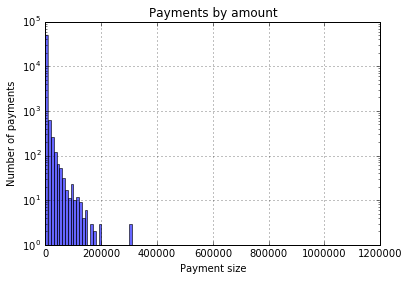

In [23]:

%pylab inline
plt.figure()
bin_range = np.arange(0, 1100000, 10000)
df['Amount'].plot(kind='hist', bins=bin_range, color='blue', alpha=0.6)
plt.ylabel("Number of payments")
plt.xlabel("Payment size")
plt.yscale('log', nonposy='clip')
plt.title("Payments by amount")
plt.grid()
